In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?' + \
    'Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&' + \
    'PlayerPosition=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&' + \
    'StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season' + \
    '=2017-18&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff' + \
    '=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=' + \
    '&SeasonType=Regular+Season&SeasonSegment=&GameID='

In [3]:
#get the webpage containing the data
# need to use headers per https://stackoverflow.com/questions/46781563/how-to-obtain-a-json-response-from-the-stats-nba-com-api
request_headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
response = requests.get(shot_chart_url, headers = request_headers)
#grab the headers to be used as the column headers for the DataFrame
headers = response.json()['resultSets'][0]['headers']
#grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']


In [4]:
shot_df = pd.DataFrame(shots, columns = headers)
#display DataFrame
from IPython.display import display
with pd.option_context ('display.max_columns', None):
    display(shot_df.head(10))

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700002,56,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,9,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,95,242,1,1,20171017,GSW,HOU
1,Shot Chart Detail,0021700002,167,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,32,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,129,43,1,0,20171017,GSW,HOU
2,Shot Chart Detail,0021700002,207,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,14,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,10,1,0,20171017,GSW,HOU
3,Shot Chart Detail,0021700002,219,201939,Stephen Curry,1610612744,Golden State Warriors,2,8,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-127,239,1,0,20171017,GSW,HOU
4,Shot Chart Detail,0021700002,370,201939,Stephen Curry,1610612744,Golden State Warriors,3,11,13,Made Shot,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-13,14,1,1,20171017,GSW,HOU
5,Shot Chart Detail,0021700002,373,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,57,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,30,252,1,1,20171017,GSW,HOU
6,Shot Chart Detail,0021700002,379,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,6,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,168,208,1,0,20171017,GSW,HOU
7,Shot Chart Detail,0021700002,408,201939,Stephen Curry,1610612744,Golden State Warriors,3,7,15,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,130,17,1,1,20171017,GSW,HOU
8,Shot Chart Detail,0021700002,540,201939,Stephen Curry,1610612744,Golden State Warriors,4,10,55,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,9,21,1,0,20171017,GSW,HOU
9,Shot Chart Detail,0021700002,553,201939,Stephen Curry,1610612744,Golden State Warriors,4,9,39,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,-2,264,1,0,20171017,GSW,HOU


In [5]:
#select right side 3-pointers
right_df = shot_df[np.logical_or(shot_df.SHOT_ZONE_AREA == "Right Side(R)", shot_df.SHOT_ZONE_AREA == "Right Side Center(RC)")]
right_three_df = right_df[right_df['SHOT_TYPE']=='3PT Field Goal']

from IPython.display import display
with pd.option_context ('display.max_columns', None):
    display(right_three_df.head(10))

# Select right shots made
right_three_made_df = right_three_df[right_three_df['SHOT_MADE_FLAG']==1]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700002,56,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,9,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,95,242,1,1,20171017,GSW,HOU
6,Shot Chart Detail,0021700002,379,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,6,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,168,208,1,0,20171017,GSW,HOU
18,Shot Chart Detail,0021700025,30,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,226,12,1,0,20171020,NOP,GSW
19,Shot Chart Detail,0021700025,65,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,35,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,233,37,1,0,20171020,NOP,GSW
22,Shot Chart Detail,0021700025,112,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,45,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,149,209,1,0,20171020,NOP,GSW
30,Shot Chart Detail,0021700025,546,201939,Stephen Curry,1610612744,Golden State Warriors,3,1,50,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,192,184,1,1,20171020,NOP,GSW
31,Shot Chart Detail,0021700025,550,201939,Stephen Curry,1610612744,Golden State Warriors,3,1,19,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,171,197,1,0,20171020,NOP,GSW
33,Shot Chart Detail,0021700025,712,201939,Stephen Curry,1610612744,Golden State Warriors,4,1,10,Made Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,239,17,1,1,20171020,NOP,GSW
40,Shot Chart Detail,0021700033,287,201939,Stephen Curry,1610612744,Golden State Warriors,2,4,9,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,89,237,1,1,20171021,MEM,GSW
47,Shot Chart Detail,0021700033,647,201939,Stephen Curry,1610612744,Golden State Warriors,4,3,15,Missed Shot,Running Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,28,90,273,1,0,20171021,MEM,GSW


In [6]:
#select left 3-pointers
left_df = shot_df[np.logical_or(shot_df.SHOT_ZONE_AREA == "Left Side(L)", shot_df.SHOT_ZONE_AREA == "Left Side Center(LC)")]

left_three_df = left_df[left_df['SHOT_TYPE']=='3PT Field Goal']

from IPython.display import display
with pd.option_context ('display.max_columns', None):
    display(left_three_df.head(10))

# Select left 3-pointers made
left_three_made_df = left_three_df[left_three_df['SHOT_MADE_FLAG']==1]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
3,Shot Chart Detail,0021700002,219,201939,Stephen Curry,1610612744,Golden State Warriors,2,8,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-127,239,1,0,20171017,GSW,HOU
17,Shot Chart Detail,0021700002,681,201939,Stephen Curry,1610612744,Golden State Warriors,4,0,5,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-210,145,1,0,20171017,GSW,HOU
21,Shot Chart Detail,0021700025,103,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,28,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-221,144,1,0,20171020,NOP,GSW
24,Shot Chart Detail,0021700025,146,201939,Stephen Curry,1610612744,Golden State Warriors,1,1,7,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,30,-133,275,1,1,20171020,NOP,GSW
25,Shot Chart Detail,0021700025,326,201939,Stephen Curry,1610612744,Golden State Warriors,2,4,26,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-103,236,1,1,20171020,NOP,GSW
26,Shot Chart Detail,0021700025,357,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,21,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-159,221,1,0,20171020,NOP,GSW
29,Shot Chart Detail,0021700025,522,201939,Stephen Curry,1610612744,Golden State Warriors,3,3,45,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-117,227,1,0,20171020,NOP,GSW
37,Shot Chart Detail,0021700033,90,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,2,Missed Shot,Running Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-143,221,1,0,20171021,MEM,GSW
39,Shot Chart Detail,0021700033,283,201939,Stephen Curry,1610612744,Golden State Warriors,2,4,26,Made Shot,Running Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-100,232,1,1,20171021,MEM,GSW
44,Shot Chart Detail,0021700033,474,201939,Stephen Curry,1610612744,Golden State Warriors,3,3,53,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-171,184,1,0,20171021,MEM,GSW


In [7]:
#draw the court
from matplotlib.patches import Circle, Rectangle, Arc

#10 units = 1 foot

def draw_court(ax = None, color="black", lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    # Create basketball hoop
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    backboard = Rectangle((-30,-7.5), 60, -1, linewidth=lw, color=color)
    
    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

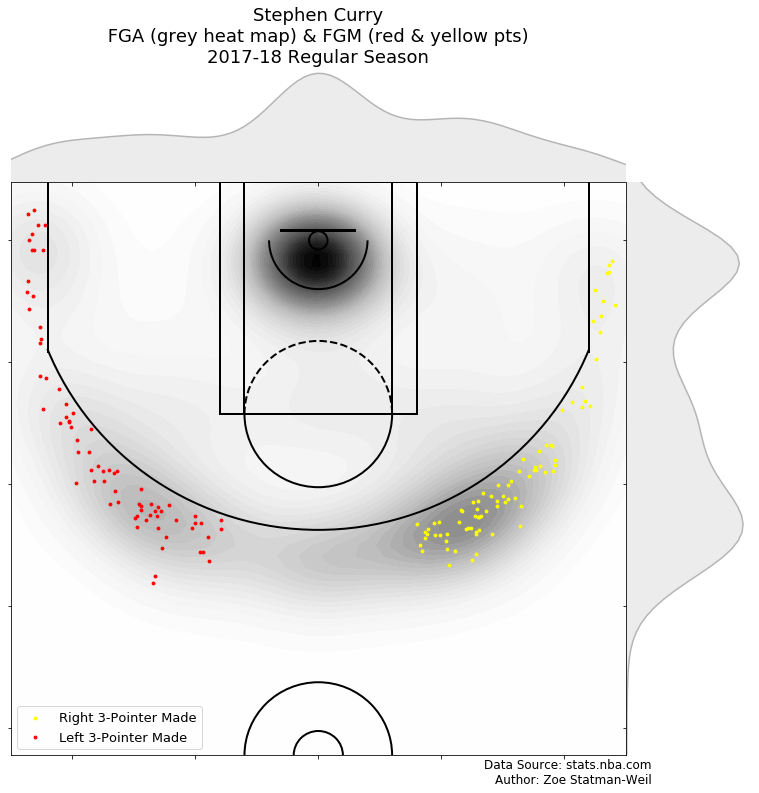

In [8]:
cmap=plt.cm.Greys

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.4),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Add FGM
RFGM = ax.scatter(right_three_made_df.LOC_X, right_three_made_df.LOC_Y, c="yellow", s=8)
LFGM = ax.scatter(left_three_made_df.LOC_X, left_three_made_df.LOC_Y, c="red", s=8)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add legend
ax.legend([RFGM, LFGM],["Right 3-Pointer Made","Left 3-Pointer Made"], fontsize=13)

# Add a title
ax.set_title('Stephen Curry\n FGA (grey heat map) & FGM (red & yellow pts) \n2017-18 Regular Season', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(135,445,'Data Source: stats.nba.com'
        '\nAuthor: Zoe Statman-Weil',
        fontsize=12, multialignment = "right")

plt.show()

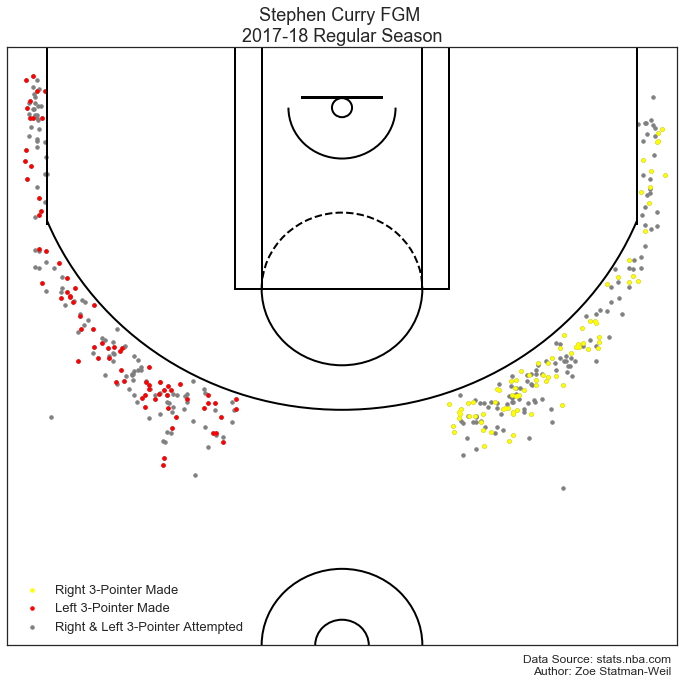

In [9]:
#Create a map of left and right side 3-Pointers taken
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))

# Draw 3-Pointers Attempted
RFGA = plt.scatter(right_three_df.LOC_X, right_three_df.LOC_Y, c="grey", s=12)
LFGA = plt.scatter(left_three_df.LOC_X, left_three_df.LOC_Y, c="grey", s=12)

# Draw 3-Pointers Made
RFGM = plt.scatter(right_three_made_df.LOC_X, right_three_made_df.LOC_Y, c="yellow", s=12)
LFGM = plt.scatter(left_three_made_df.LOC_X, left_three_made_df.LOC_Y, c="red", s=12)

draw_court()

# Adjust plot limits to just fit in half court
plt.xlim(-250,250)

# Descending values along the  axis from bottom to top in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)

#add legend
plt.legend([RFGM, LFGM, RFGA],["Right 3-Pointer Made","Left 3-Pointer Made", "Right & Left 3-Pointer Attempted"], fontsize=13)

# Remove axis tick labels
plt.tick_params(labelbottom=False, labelleft=False)

# Add a title
plt.title('Stephen Curry FGM \n2017-18 Regular Season', fontsize=18)

# Add Data Source and Author
plt.text(135,445,'Data Source: stats.nba.com'
        '\nAuthor: Zoe Statman-Weil',
        fontsize=12, multialignment = "right")

plt.show()

In [10]:
right_three_perc = right_three_df["SHOT_MADE_FLAG"].sum() / float(right_three_df["SHOT_ATTEMPTED_FLAG"].sum())
right_three_perc

0.4153846153846154

In [11]:
left_three_perc = left_three_df["SHOT_MADE_FLAG"].sum() / float(left_three_df["SHOT_ATTEMPTED_FLAG"].sum())
left_three_perc

0.40217391304347827

In [12]:
# Calculate total 3-Pionter percentage
three_shot_df = shot_df[shot_df['SHOT_TYPE']=='3PT Field Goal']
three_shot_made_df = three_shot_df[three_shot_df['SHOT_MADE_FLAG']==1]

three_shot_attempt = three_shot_df['SHOT_ATTEMPTED_FLAG'].sum()
three_shot_made = three_shot_made_df['SHOT_MADE_FLAG'].sum()

In [13]:
# Calculate total 3-Pionter percentag
float(three_shot_made) / three_shot_attempt

0.4231536926147705

In [14]:
right_three_df["SHOT_ATTEMPTED_FLAG"].sum()
    

195

In [15]:
left_three_df["SHOT_ATTEMPTED_FLAG"].sum()

184